Q1.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [2]:
df_pharmacy = df[df["상권업종소분류명"] == "약국"] 
df_pharmacy["시도명"].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

Q2.

In [4]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64


<AxesSubplot:xlabel='count', ylabel='시도명'>

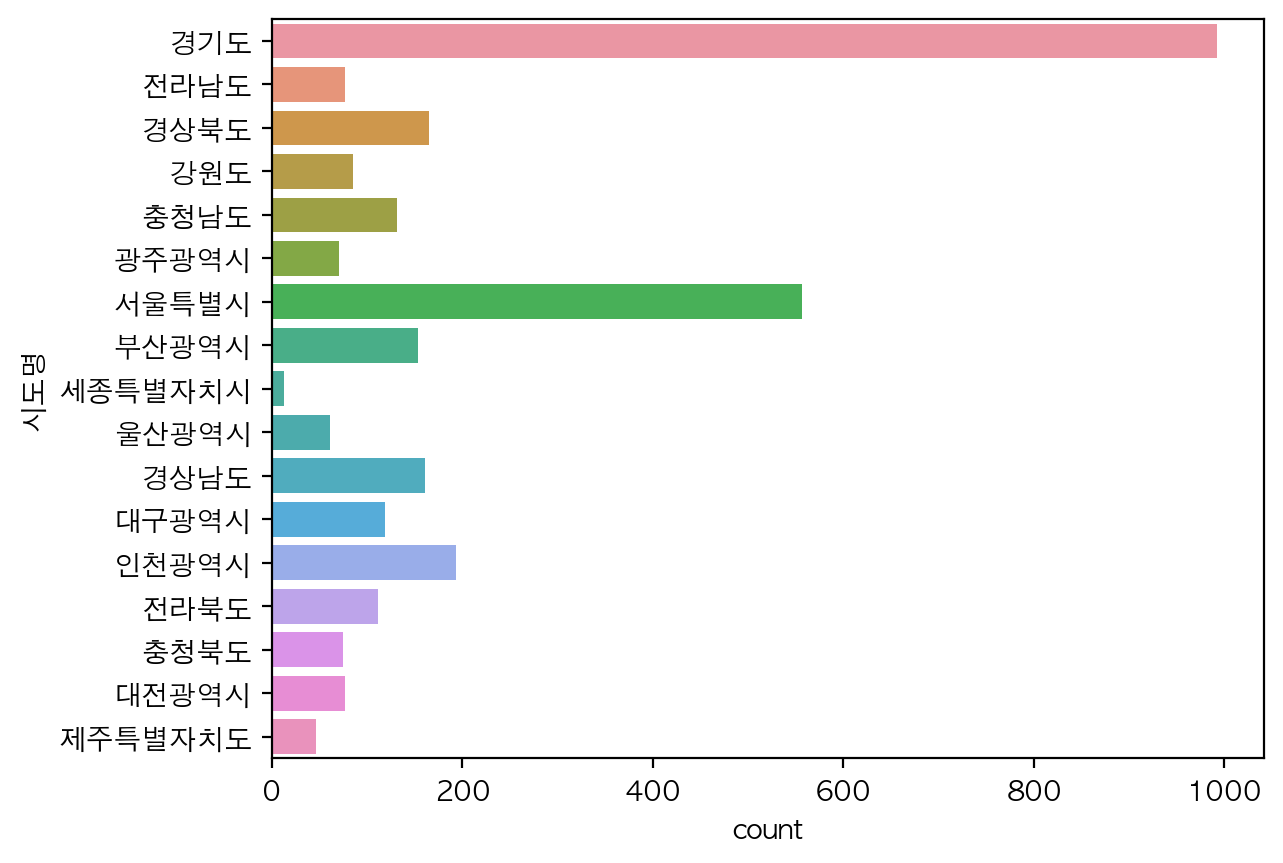

In [6]:
import seaborn as sns

df_veterinary = df[df["상권업종소분류명"] == "동물병원"]
print(df_veterinary["시도명"].value_counts())
sns.countplot(data=df_veterinary, y="시도명")

Q3.

<AxesSubplot:xlabel='시군구명', ylabel='count'>

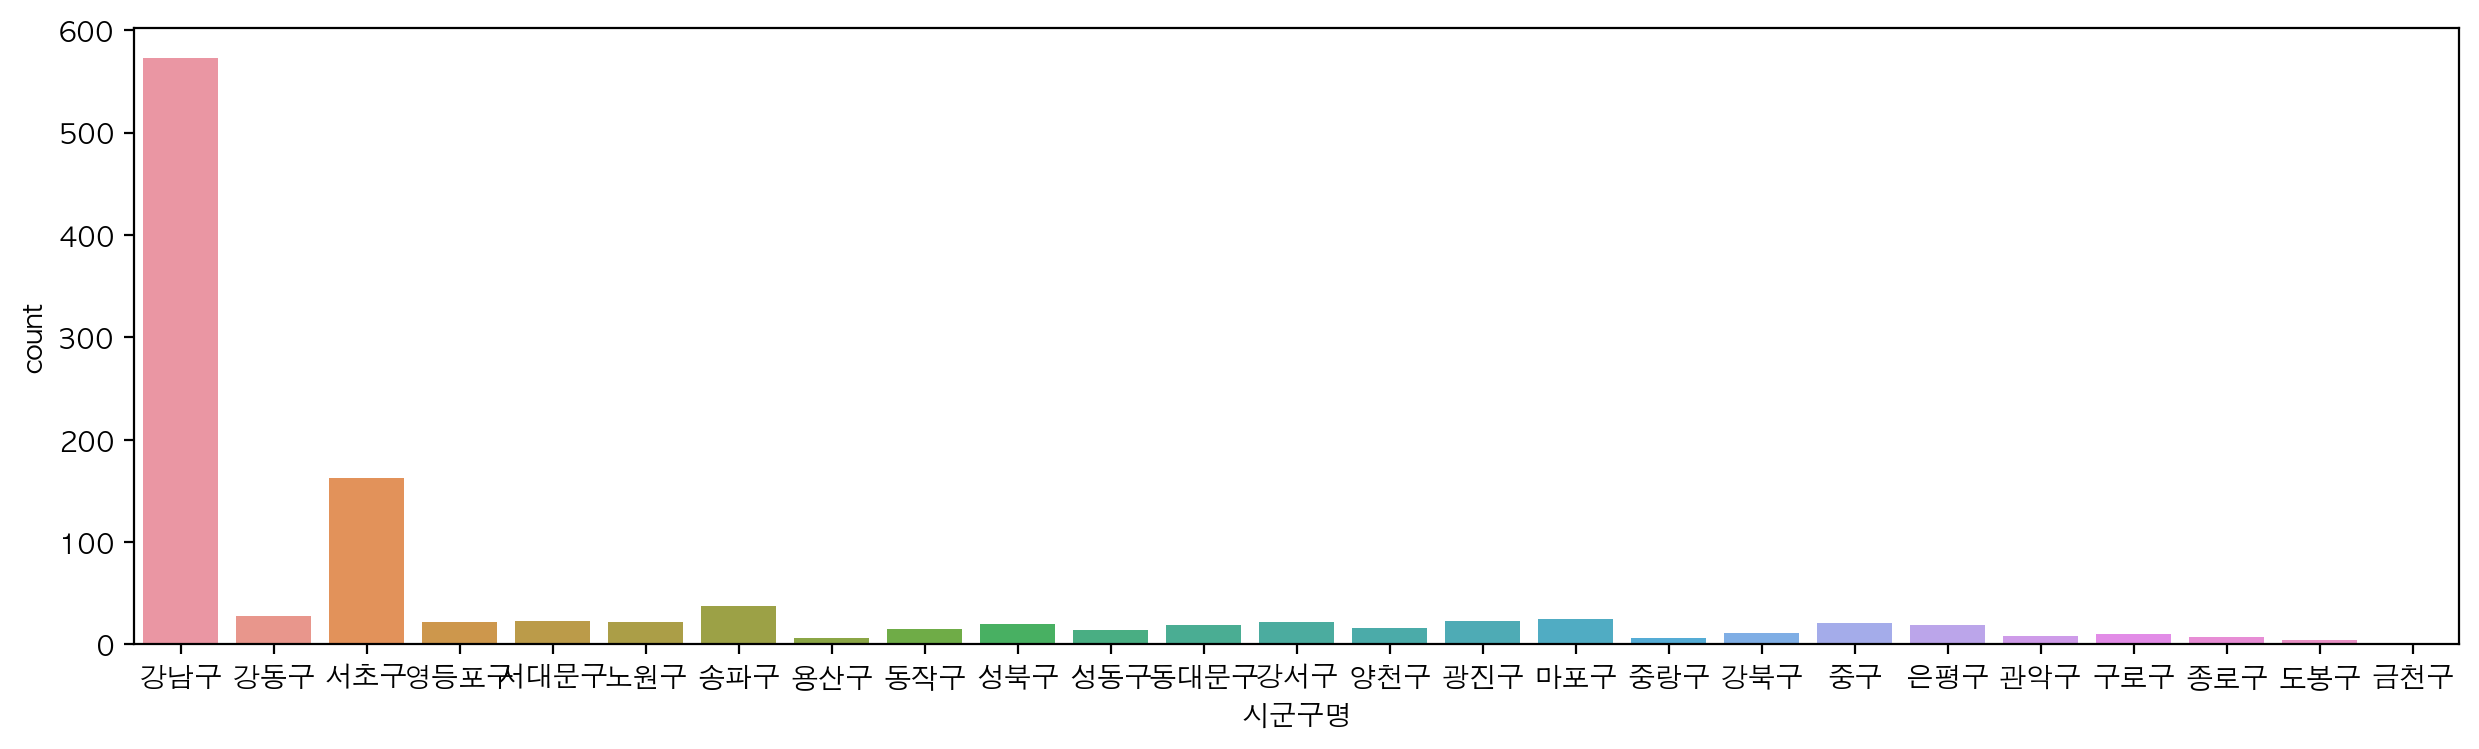

In [22]:
df_seoul_hospital = df[(df["시도명"] == "서울특별시")&(df["상권업종중분류명"] == "병원")]
df_seoul_hospital_skin_plastic = df_seoul_hospital[(df_seoul_hospital["상호명"].str.contains("피부"))|(df_seoul_hospital["상호명"].str.contains("성형"))]
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital_skin_plastic, x="시군구명")

In [32]:
df_seoul_hospital = df[(df["시도명"] == "서울특별시")&(df["상권업종중분류명"] == "병원")]
count_seoul_hospital = df_seoul_hospital["시군구명"].value_counts()
count_seoul_hospital.name = "전체병원 수"

df_seoul_hospital_skin_plastic = df_seoul_hospital[(df_seoul_hospital["상호명"].str.contains("피부"))|(df_seoul_hospital["상호명"].str.contains("성형"))]
count_seoul_hospital_skin_plastic = df_seoul_hospital_skin_plastic["시군구명"].value_counts()
count_seoul_hospital_skin_plastic.name = "피부과 성형외과 수"

count_ratio_df = pd.merge(count_seoul_hospital, count_seoul_hospital_skin_plastic, right_index = True,
               left_index = True)

count_ratio_df.index.name = "시군구명"
count_ratio_df["ratio"] = count_ratio_df["피부과 성형외과 수"]/count_ratio_df["전체병원 수"]
print(count_ratio_df)

      전체병원 수  피부과 성형외과 수     ratio
시군구명                              
강남구     2550         573  0.224706
서초구     1196         163  0.136288
송파구      748          38  0.050802
동대문구     644          19  0.029503
광진구      600          23  0.038333
강서구      579          22  0.037997
영등포구     516          22  0.042636
은평구      506          19  0.037549
노원구      503          22  0.043738
강동구      494          28  0.056680
성북구      470          20  0.042553
마포구      456          25  0.054825
중구       423          21  0.049645
양천구      398          16  0.040201
관악구      395           8  0.020253
서대문구     379          23  0.060686
종로구      343           7  0.020408
동작구      342          15  0.043860
성동구      339          14  0.041298
중랑구      307           6  0.019544
구로구      289          10  0.034602
도봉구      275           4  0.014545
강북구      259          11  0.042471
용산구      222           6  0.027027
금천구      173           1  0.005780


Q4.

In [ ]:
import folium

df_elder = df[df["상권업종소분류명"] == "노인/치매병원"]
print(df_elder["시도명"].value_counts())

geo_df = df_elder.copy()

fmap = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    folium.Marker(
        location = [geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        popup = popup_name
    ).add_to(fmap)